# Tasks

In [5]:
# Import Data frames.
import pandas as pd

# Machine Learning Library that contains example datasets.
import sklearn as skl

## Task 1: Source the Data Set

In [6]:
# Load the iris dataset.
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

## Task 2: Explore the Data Structure

In [7]:
# Have a look.
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


1. The dataset tells us how many rows and columns the dataset has.
2. The first 5 rows of the dataset: give us an idea of the structure and values in the dataset.
3. The last 5 rows of the dataset: help us confirm the consistency of the dataset.
4. The feature names: column names.
5. Target classes: these represent the categories of the species (Setosa, Virginica).

In [8]:
# Describe the dataset.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Task 3: Summarize the Data

In [ ]:
# Compute summary statistics for numerical columns only (excluding 'species')
summary = df.describe().T  # Transpose for better readability

# Compute median separately (exclude non-numeric columns)
summary["median"] = df.select_dtypes(include=['number']).median()

# Select only relevant columns
summary = summary[["mean", "min", "max", "std", "median"]]

# Display the summary
summary

,mean,min,max,std,median
sepal_length,5.843333,4.3,7.9,0.828066,5.80
sepal_width,3.054000,2.0,4.4,0.433594,3.00
petal_length,3.758667,1.0,6.9,1.764420,4.35
petal_width,1.198667,0.1,2.5,0.763161,1.30


## Task 4: Visualize Features

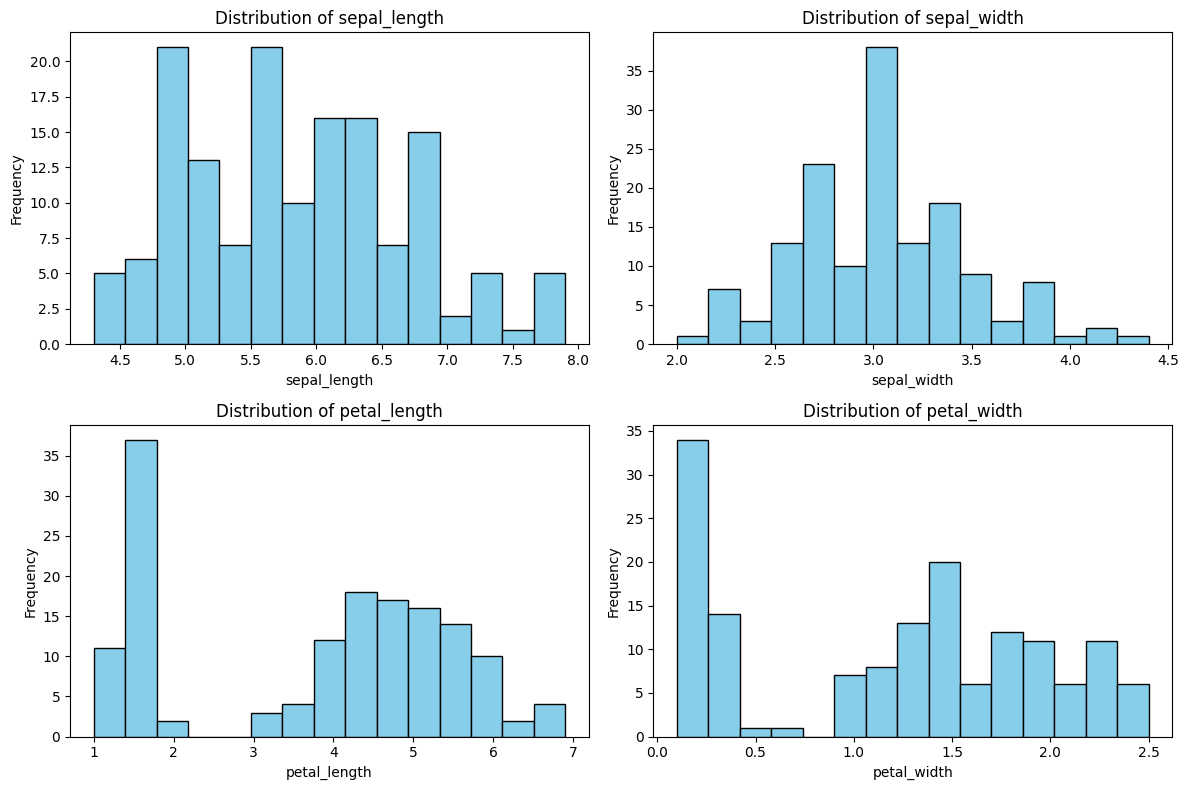

In [10]:
import matplotlib.pyplot as plt

# Define feature columns (excluding 'species')
features = df.columns[:-1]  # All columns except the last one ('species')

# Set figure size
plt.figure(figsize=(12, 8))

# Loop through features and plot histograms
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of subplots
    plt.hist(df[feature], bins=15, color='skyblue', edgecolor='black')  # Histogram
    plt.title(f"Distribution of {feature}")  # Title
    plt.xlabel(feature)  # X-axis label
    plt.ylabel("Frequency")  # Y-axis label

# Adjust layout for clarity
plt.tight_layout()
plt.show()


## Task 5: Investigate Relationships

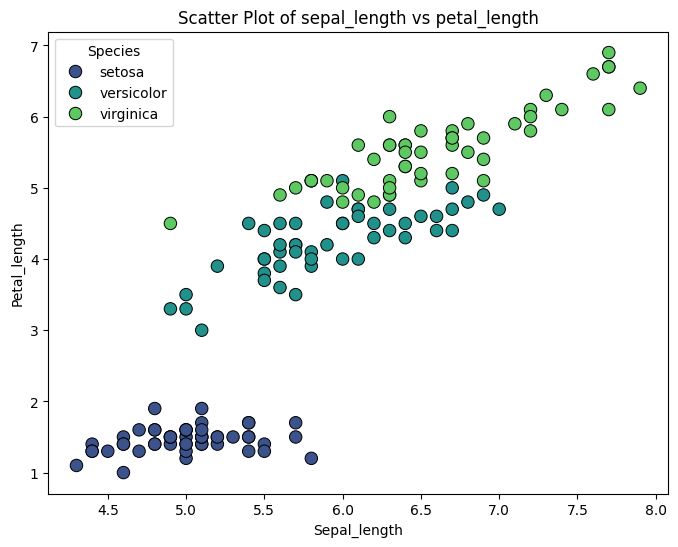

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose two features for the scatter plot
x_feature = "sepal_length"
y_feature = "petal_length"

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[x_feature], y=df[y_feature], hue=df["species"], palette="viridis", s=80, edgecolor="black")

# Add labels and title
plt.xlabel(x_feature.capitalize())
plt.ylabel(y_feature.capitalize())
plt.title(f"Scatter Plot of {x_feature} vs {y_feature}")

# Show the legend
plt.legend(title="Species")

# Display the plot
plt.show()


## Task 6: Analyze Relationship

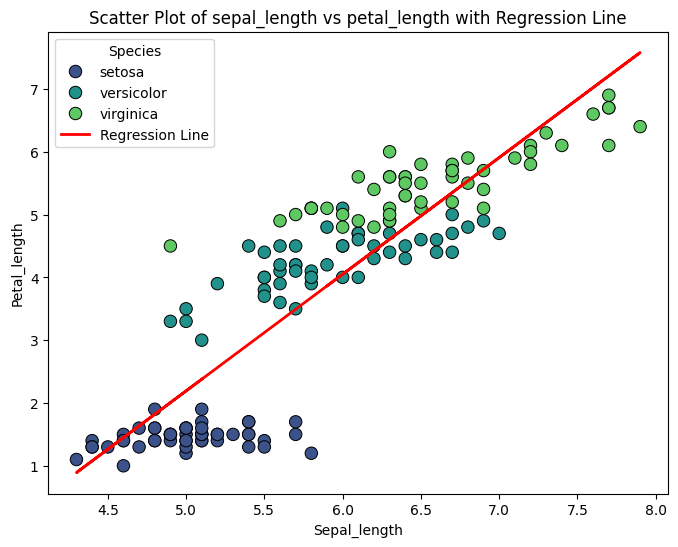

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Choose two features for scatter plot
x_feature = "sepal_length"
y_feature = "petal_length"

# Extract numerical data
x = df[x_feature]
y = df[y_feature]

# Fit a linear regression line (degree=1 for a straight line)
slope, intercept = np.polyfit(x, y, 1)

# Create scatter plot with species color-coded
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, hue=df["species"], palette="viridis", s=80, edgecolor="black")

# Plot regression line
plt.plot(x, slope * x + intercept, color="red", linewidth=2, label="Regression Line")

# Add labels and title
plt.xlabel(x_feature.capitalize())
plt.ylabel(y_feature.capitalize())
plt.title(f"Scatter Plot of {x_feature} vs {y_feature} with Regression Line")

# Show legend
plt.legend(title="Species")

# Display the plot
plt.show()


## Task 7: Analyze Class Distribution

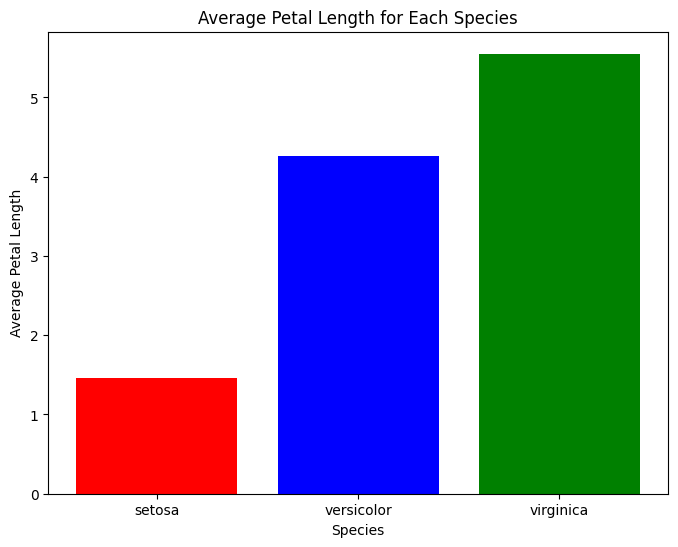

In [21]:
import matplotlib.pyplot as plt

# Calculate mean petal length for each species
species = df["species"].unique()
mean_petal_lengths = df.groupby("species")["petal_length"].mean()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(species, mean_petal_lengths, color=["red", "blue", "green"])

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Average Petal Length")
plt.title("Average Petal Length for Each Species")

# Display the plot
plt.show()


## End